

# Project: No Show Appointments database investigation 

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> In this project, I will analyze a dataset that has information about medical appointment focus on patient how whether or not patients show up for their appointment.
In particular, I will try to answers these questions:
Is there a relationship between patients who show up and have a scholarship?
Is there a relationship between patients who show up and Gender?
Is there a relationship between patients who reveived SMS and Show up?

In [145]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling



### General Properties

In [146]:
df=pd.read_csv("noshowappointments.csv")
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [147]:
df.shape

(110527, 14)

In [148]:
#checking the data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [149]:
#check for missing values
pd.isna(df).sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [150]:
#check for duplicate values
sum(df.duplicated())

0

In [151]:
#here I drop each column I don't need for it.
df.drop(['PatientId','AppointmentID','Hipertension','Diabetes','Handcap','Alcoholism'],axis=1,inplace=True)
df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,SMS_received,No-show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,0,No
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,No
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,No
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,No
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,No


In [152]:
#correct the data type for some column
df["ScheduledDay"]=df["ScheduledDay"].astype('datetime64')
df["AppointmentDay"]=df["AppointmentDay"].astype('datetime64')


In [153]:
#rename no show column 
df.rename(columns={'No-show':'No_show'},inplace = True)

#convert no show column to numric column so i can used it with group py
df.No_show[df['No_show'] == 'Yes'] = 1
df.No_show[df['No_show'] == 'No'] = 0

#create mask for show and not showed
showUp = df['No_show'] == 0
not_showed = df['No_show'] == 1
df['showUp'] = showUp
df['not_showed'] = not_showed

<ipython-input-153-9adc5fbcb406>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.No_show[df['No_show'] == 'Yes'] = 1
<ipython-input-153-9adc5fbcb406>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.No_show[df['No_show'] == 'No'] = 0


In [154]:
#check uniqnes to find outliers
print ("Age:", sorted(df.Age.unique()))
print ("Scholarship:", df.Scholarship.unique())
print ("SMS_received:", df.SMS_received.unique())
print ("No-show:", df.No_show.unique())
print ("Gender:", df.Gender.unique())

Age: [-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 102, 115]
Scholarship: [0 1]
SMS_received: [0 1]
No-show: [0 1]
Gender: ['F' 'M']


In [155]:
#there is incorrect data in age column like minus and 0 dosen't make since that is correct age
#i will remove it from the dataset 
df.drop(df.index[df['Age'] <= 0], inplace = True)

In [156]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 106987 entries, 0 to 110526
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Gender          106987 non-null  object        
 1   ScheduledDay    106987 non-null  datetime64[ns]
 2   AppointmentDay  106987 non-null  datetime64[ns]
 3   Age             106987 non-null  int64         
 4   Neighbourhood   106987 non-null  object        
 5   Scholarship     106987 non-null  int64         
 6   SMS_received    106987 non-null  int64         
 7   No_show         106987 non-null  object        
 8   showUp          106987 non-null  bool          
 9   not_showed      106987 non-null  bool          
dtypes: bool(2), datetime64[ns](2), int64(3), object(3)
memory usage: 7.6+ MB


<a id='eda'></a>
## Exploratory Data Analysis


 ### Research Question 1( What is patient's age more likely to miss the appoinment?)

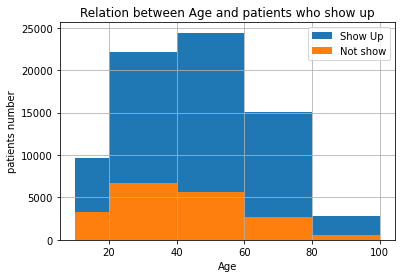

In [180]:
#make a histogram to range for patient's age to see who are more likely to miss the appointment
df.Age[showUp].hist(bins=[10, 20, 40, 60, 80, 100], label='Show Up')
df.Age[not_showed].hist(bins=[10, 20, 40, 60, 80,100],label='Not show');
plt.xlabel('Age')
plt.ylabel("patients number")
plt.title('Relation between Age and patients who show up')
plt.legend();


<a id='eda'></a>


 ### Research Question 2( Is there a relationship between patients who show up and have a scholarship?)

Text(0.5, 1.0, "relationship between patient's scholarship with showing to the appointment")

<Figure size 1080x1080 with 0 Axes>

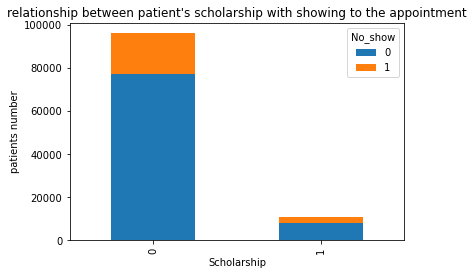

In [188]:
#define function to plot bar chart to see the relationship between patients who show up and have a scholarship
def bar_chart(val1,val2):
    fig = plt.figure(figsize=(15, 15))
    df.groupby([val1, val2])[val1].count().unstack(val2).plot(kind='bar', stacked=True)
    plt.xlabel(val1)


#use function to plot a chart to see if there a relationship between Scholarship and showing to the appointment
bar_chart("Scholarship","No_show")
plt.ylabel("patients number")
plt.title("relationship between patient's scholarship with showing to the appointment")

<a id='eda'></a>

 ### Research Question 3( Is there a relationship between patients who show up and Gender?)

Text(0.5, 1.0, "relationship between patient's Gender with showing to the appointment")

<Figure size 1080x1080 with 0 Axes>

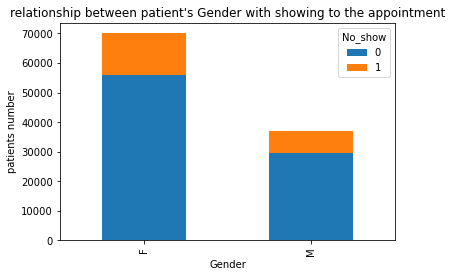

In [185]:
#use function to plot a chart to see the relationship between Patient's gender and showing up to the appointment
bar_chart("Gender","No_show")
plt.ylabel("patients number")
plt.title("relationship between patient's Gender with showing to the appointment")

<a id='eda'></a>

 ### Research Question 4( Is there a relationship between patients who received SMS and Show up?)

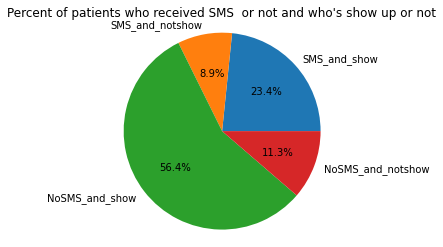

In [190]:
#see the relationship between receiving SMS reminder to show to the appointment
#fisrt identify the patient who received SMS reminder if they show to the appointment or not 
# and the patient who dosen't received SMS reminder if they show to the appointment or not

SMS_and_show= len(df.loc[(df['SMS_received'] == 1) & (df['No_show'] == 0 )])
SMS_and_notshow= len(df.loc[(df['SMS_received'] == 1) & (df['No_show'] == 1)])
NoSMS_and_show= len(df.loc[(df['SMS_received'] == 0) & (df['No_show'] == 0 )])
NoSMS_and_notshow= len(df.loc[(df['SMS_received'] == 0) & (df['No_show'] == 1)])

#visualize the percent for each one using pie chart
labels = 'SMS_and_show', 'SMS_and_notshow','NoSMS_and_show','NoSMS_and_notshow'
sizes = [SMS_and_show, SMS_and_notshow,NoSMS_and_show,NoSMS_and_notshow]

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%')
ax1.axis('equal')
plt.title("Percent of patients who received SMS  or not and who's show up or not")
plt.show()

<a id='conclusions'></a>
## limitations

> - If there is more features in the dataset maybe it will help to get better analysis.

<a id='conclusions'></a>
## Conclusions

>Most common age who miss the appointments between 20-40

> I was thinking that the patients who have scholarship they will show up for there appointments, but as we see there is no impact between who have scholarship and other patients.

> The gender factors don't make a difference so I can't decide either the patient will show up or not.

>we can see that the most common factor between patients who show up in their appointment that they received an SMS reminder for there appointment.
 